<a href="https://colab.research.google.com/github/Preeti27092000/Insurance_charge_prediction/blob/main/MSCFintech_Preeti_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = "/content/drive/MyDrive/ML/insurance.csv"

# Data preparation

In [ ]:
# load the csv data and store it in df_insurance
# get first 5 rows of data
df_insurance = pd.read_csv(filepath) 
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# making one copy of main dataframe
df_insurance2 = df_insurance.copy()

## information about data

In [ ]:
df_insurance.shape

(1338, 7)

In [ ]:
# There are 1338 rows and 7 columns

In [ ]:
df_insurance.info()
# .info() method gives us data type of column,number of non-null cells as well column name and memory usages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df_insurance.describe()
'''.describe() method gives us statistical insight about data where we can find all these information for each column 
count = count of rows
mean = average 
median = 50% of data is below the median value
standard seviation = data values are spread from mean by + or - SD
25% = 1st quartile which means 25% of our data is below Q1 value
75% = 3rd quartile which means 75% of data is below Q3 value
 '''

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df_insurance.columns
# .columns attribute gives us names of column

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df_insurance.isnull().sum()
# by default in sum method axis = 0 which means rows, to check each column of row use axis = 1

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Interpretation : There are no null values

## Value counts of categorical data


In [ ]:
df_insurance['sex'].value_counts()*100/len(df_insurance)
# .value_counts() gives us count of each value about how many times it occurs in dataframe
# it is mainly used to check the frequency of categorical variable
# evenly distributed

male      50.523169
female    49.476831
Name: sex, dtype: float64

In [ ]:
df_insurance['smoker'].value_counts()*100/len(df_insurance)
# not evenly distributed but there cannot be under or over sampling

no     79.521674
yes    20.478326
Name: smoker, dtype: float64

In [ ]:
df_insurance['region'].value_counts()*100/len(df_insurance)
# evenly distributed

southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: region, dtype: float64

In [ ]:
df_insurance['children'].value_counts()*100/(len(df_insurance))
# not evenly distributed but can not say over or under sampling

0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: children, dtype: float64

**Interpretation : We can seen that each category has equal proportion in above particular column hence no need to drop any column but 'children' column has
98% of data within a range of '0 to 3 children'**

# Check distribution of data

Text(0.5, 1.0, 'Distribution of all numerical columns')

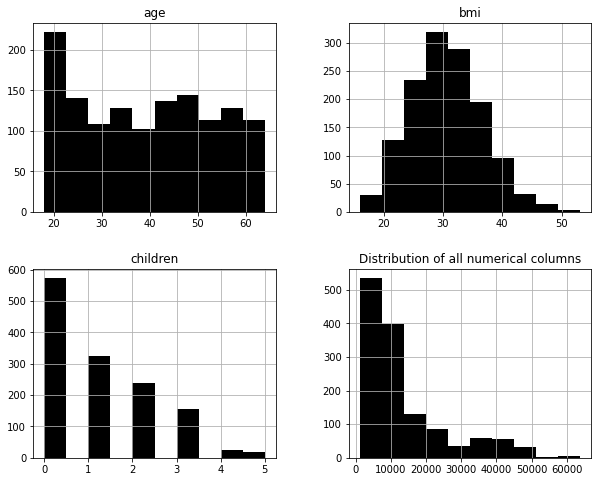

In [ ]:
plt.rcParams['figure.figsize'] = [10,8]
df_insurance.hist(color = 'black')
plt.title("Distribution of all numerical columns")
# matplotlib has method called rcParams in which 'figure.figsize' helps us to decide the length and breadth of figure which lies in white plane
# In next line, we are using 'hist' to make histogram of numerical columns only which is used to visualise skewnwss of each column and its normal distribution
# If column has number but it is actually a column of classification then histogram of such column will not be continuous as we can see this in 'children' column

**Here we can see that 'bmi' is normally distributed histogram while 'children' column is seems to be rightly skewed. While
'age' column shows that we have customer of around 20 age.
As well we can see that our target variable is also skewd on right side**

In [ ]:
df_target = df_insurance2['charges']
df_target.shape
# making different dataframe for dependent variable (target variable) 'charges' and checking its shape

(1338,)

# OUTLIERS
 Outliers are such extremely low or high value as compared to normal data values. We need to give specific treatment to it or else it will affect so many things such as central tendency and many more.

**Check outliers**

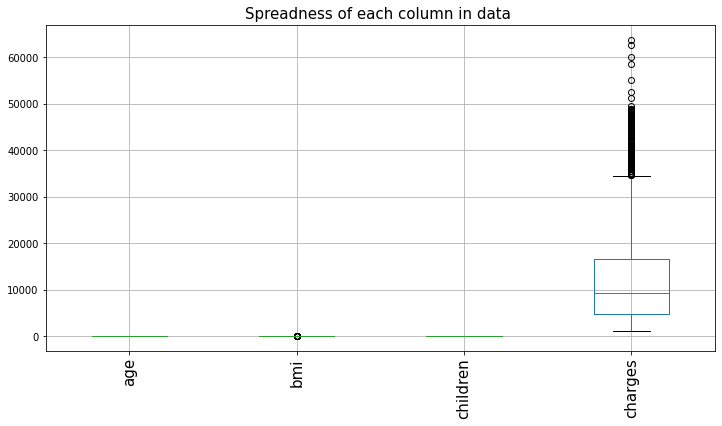

In [ ]:
# pass the wisth and height (by default in inches) inside tuple
# this woeks as same as rcParams
plt.figure(figsize = (12,6))

# find outliers by plotting boxplot
df_insurance.boxplot()

# set plot label and textsize using fontsize
plt.title("Spreadness of each column in data ",fontsize = 15)

# xticks = label on xaxis,rotation = 'vertical' will rotate x text vertically (can also pass degree to rotate x ticks)
plt.xticks(rotation = 'vertical',fontsize = 15)
plt.show()



In [ ]:
# here we can see that range of 'charges' column is too large and hence we are not able to see outliers in other independentvariables so lets make one more boxplot excluding 'charges' column

Text(0.5, 0, 'Independent numeric columns')

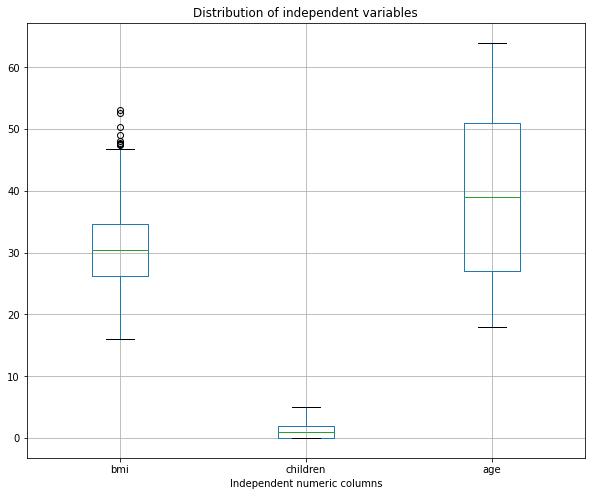

In [ ]:
df_insurance[['bmi','children','age']].boxplot()
# df_insurance.loc[:,['bmi','children','age']].boxplot()
# use .loc to select the variables
# loc gives rows or coluns by its name or labels while, iloc returns by indexing position
plt.title("Distribution of independent variables")
plt.xlabel("Independent numeric columns")


**Treatment to outliers**

In [ ]:
q1 = df_insurance.quantile(0.25) # first quartile
print("1st quartile :\n",q1)
print("*******************************************")
q3 = df_insurance.quantile(0.75) # third quartile
print("3rd quartile :\n",q3)
iqr = q3 - q1 # inter quartile range
df_insurance = df_insurance[~((df_insurance < (q1 - 1.5 * iqr)) | (df_insurance > (q3 + 1.5 * iqr))).any(axis=1)]

1st quartile :
 age           27.00000
bmi           26.29625
children       0.00000
charges     4740.28715
Name: 0.25, dtype: float64
*******************************************
3rd quartile :
 age            51.000000
bmi            34.693750
children        2.000000
charges     16639.912515
Name: 0.75, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys


In [ ]:
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df_insurance_num = df_insurance.select_dtypes(include = 'number')

In [ ]:
df_insurance_cat = df_insurance.select_dtypes(include='object')

In [ ]:
df_insurance_num.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [ ]:
df_insurance_num = df_insurance_num.apply(lambda rec: (rec - rec.mean()) / rec.std())

df_insurance_num.head()

,age,bmi,children,charges
0,-1.420812,-0.357691,-0.892497,0.957432
1,-1.491918,0.642842,-0.070297,-1.133133
2,-0.780856,0.511596,1.574103,-0.757490
3,-0.425326,-1.243171,-0.892497,1.660689
4,-0.496432,-0.190652,-0.892497,-0.837835


In [ ]:
df_insurance_new = pd.concat([df_insurance_cat,df_insurance_num],axis = 1)
df_insurance_new

In [ ]:

df_insurance_new.iloc[:,3:7] = df_insurance_new.iloc[:,3:7].apply(lambda rec: (rec - rec.mean()) / rec.std())
df_insurance_new.head()

In [ ]:
df_insurance_without_target = df_insurance_new.drop('charges',axis = 1)

In [ ]:
df_insurance_target = df_insurance_new['charges']

In [ ]:
df_insurance_num = df_insurance_new.select_dtypes(include='number')

In [ ]:
df_insurance_num.columns

In [ ]:
df_insurance_cat = df_insurance_new.select_dtypes(include='object')

In [ ]:
df_insurance_cat.columns

In [ ]:
df_insurance_encoded = pd.get_dummies(data = df_insurance_cat)

In [ ]:
df_insurance_encoded.head()

In [ ]:
df_insurance_concat_new = pd.concat([df_insurance_num,df_insurance_encoded],axis = 1)

In [ ]:
x_full = df_insurance_concat_new.copy()

In [ ]:
y_full = df_insurance_target.copy()

In [ ]:
import statsmodels.api as sm
x_full = sm.add_constant(x_full)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_full,y_full,random_state = 1,test_size = 0.3)

In [ ]:
print('X_train_full', x_train.shape)
print('y_train_full', y_train.shape)

# print dimension of test set
print('X_test_full', x_test.shape)
print('y_test_full', y_test.shape)

In [ ]:
from statsmodels.formula.api import ols
import statsmodels


In [ ]:
base_model=sm.OLS(y_train,x_train).fit()

In [ ]:
print(base_model.summary())

In [ ]:
x = base_model.rsquared
print(f"here in our case target variable is explained by independent variables by {x} percent hence it is not desirable as exactly 1 is also not possible in real life but here it happens due to multicollinearity")
print("---------------------------------------------------------------------------------------------")


# Adj R sq
y = base_model.rsquared_adj
print(f"here in our case target values is explained by independent values by {y} values ")
print("---------------------------------------------------------------------------------------------")

# Condition no
z = base_model.condition_number
print(f"{z} severe multicolinearity lies in our model as it is larger than 1000")
print("---------------------------------------------------------------------------------------------")

# Durbin Watson
w = 2.047
print("here DW is {w} which is between 0 to 2 hence here there is positive autocorrelation between targetted and independent variables ")

# Model Performance

In [ ]:
insurance_train_pred = base_model.predict(x_train)
insurance_train_pred

**MAE**

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_train,insurance_train_pred)
print(f"mean absolute error is {mae}")

**MSE**

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train,insurance_train_pred)
print(f"mean squared error is {mse}")

**RMSE**

In [ ]:
rmse = np.sqrt(mse)
print(f"root mean squared error is {rmse}")

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df_numeric_feature_variance = df_insurance.select_dtypes(include = "number")
for i in range(len(df_numeric_feature_variance.columns)):
    vif = pd.DataFrame()
    vif['vif_factor'] = [variance_inflation_factor(df_numeric_feature_variance.values,i)for i in range(df_numeric_feature_variance.shape[1])]
    vif['feature'] = df_numeric_feature_variance.columns
    multi = vif[vif['vif_factor']>10]
    if multi.empty == False :
        df_sorted = multi.sort_values(by = 'vif_factor',ascending = False)
    else:
        print(vif)
        break
    if df_sorted.empty == False:
        df_numeric_feature_variance.drop(df_sorted.feature.iloc[0],axis = 1)
    else:
        print(vif)
        break

In [ ]:
vif['vif_factor']

In [ ]:
 vif['feature']

In [ ]:
print(vif)

In [ ]:
# as vif of 'age' column is greater than 10
df_insurance_vif = df_insurance2.drop('age',axis=1)

In [ ]:
df_insurance_vif.shape

In [ ]:
df_insurance_vif_target = df_insurance_vif['charges']

In [ ]:
df_insurance_vif_num = df_insurance_vif.select_dtypes(include='number')

In [ ]:
df_insurance_vif_cat = df_insurance_vif.select_dtypes(include='object')

In [ ]:
df_insurance_vif_without_target =  df_insurance_vif_num.drop('charges',axis = 1)

In [ ]:
encoded2 = pd.get_dummies(df_insurance_vif_cat)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_vif = ss.fit_transform(df_insurance_vif_without_target)

In [ ]:
scaled_df_vif = pd.DataFrame(scaled_vif,columns = df_insurance_vif_without_target.columns)

In [ ]:
scaled_df_vif.head()

In [ ]:
df_insurance_concat_vif = pd.concat([scaled_df_vif,encoded2],axis = 1)

In [ ]:
x2_full = df_insurance_concat_vif.copy()
x2_full.shape

In [ ]:
df_target.shape

In [ ]:
y2_full = df_insurance_vif_target.copy()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x2_full,df_target,random_state=1,test_size = 0.3)


In [ ]:
print("X_train------independent variables for training",x_train.shape)
print("Y_train------dependent variables for training",y_train.shape)
print("________________________________________________________")
print("X_test------independent variables for testing",x_test.shape)
print("Y_test------dependent variables for testing",y_test.shape)

In [ ]:
base_model_vif = sm.OLS(y_train,x_train).fit()
#print summary
base_model_vif.summary()

In [ ]:
# model evaluation
# R square
x = base_model_vif.rsquared
print(f"here in our case target variable is explained by independent variables by {x} percent which is not so good and not so bad")
print("---------------------------------------------------------------------------------------------")


# Adj R sq
y = base_model_vif.rsquared_adj
print(f"here in our case target values is explained by independent values by {y} values ")
print("---------------------------------------------------------------------------------------------")

# Condition no
z = base_model_vif.condition_number
print(f"{z} severe multicolinearity lies in our model as it is larger than 1000")
print("---------------------------------------------------------------------------------------------")

# Durbin Watson
w = 2.019
print("here DW is {w} which is nearer to 2 hence there is no autocorrelation ")